## EDA

In [ ]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("02_EDA/01_example/telecom_churn.csv")
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [6]:
data.shape

(3333, 20)

In [7]:
print("# rows :", str(data.shape[0]))
print("# columns :", str(data.shape[1]))

# rows : 3333
# columns : 20


In [8]:
len(data)

3333

In [9]:
data.index

RangeIndex(start=0, stop=3333, step=1)

In [11]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
#특정 컬럼 이름을 바탕으로 정수 인덱스 정보 획득 : get_loc -> columns
data.columns.get_loc("Area code")

2

In [14]:
#내가 관심있는 컬럼에 대해서 위치 정보들을 알고자 하면
cols = ["Area code","Customer service calls","Total intl charge"] #내가 관심있는 컬럼들을 리스트로
idx_cols = [data.columns.get_loc(col) for col in cols] 
idx_cols

[2, 18, 17]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [17]:
#잠시) 컬럼에 대한 접근 ...1개 컬럼
print(data["Churn"])
print("-"*7)
print(data.Churn)
print("-"*7)
print(data.loc[:,"Churn"]) #FM 적인 방법
print("-"*7)
print(data.iloc[:,19])


0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool
-------
0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool
-------
0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool
-------
0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool


In [22]:
#기존 bool : True, Flase에 대한 것을 숫자 1, 0으로 변경 : 타입 변경
data["Churn"] = data["Churn"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [23]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [24]:
#모든 컬럼이 아니라 수치형 컬럼에 대해서만
#혹시 내가 컬럼이 숫자인데 문자로 처리된 컬럼이 있다면 describe에서는 처리가 안됨
data.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [25]:
#수치형이 아닌 타입에 대해서 보려면, 보고자하는 타입을 include에 지정
#주의) 보고자하는 컬럼 이름이 아니라 그 컬럼의 타입이을 지정
data.describe(include = ["object","bool"])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

In [26]:
#종류만이 아니라, 비율까지도 바라봐야한다
data["Churn"].value_counts() #비율이 불균형하네에 쏠려있네에

0    2850
1     483
Name: Churn, dtype: int64

In [28]:
#numpy 기반의 벡터표현이 가능하여 일괄처리로 비율을 얻을 수 있음
data["Churn"].value_counts() / len(data)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [29]:
data["Churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [33]:
#Total day charge컬럼을 기준으로 정렬
#값을 중심으로 보려고 하니 : sort_values(by = ~)
data.sort_values(by="Total day charge", ascending= False)

State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   
...    ...             ...        ...                ...             ...   
1986    WI              70        415                 No              No   
2753    OH             134        415                 No              No   
2736    OK             127        510                 No             Yes   
1397    VT             101        510                 No              No   
1345    SD              98        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   
...                     ...                ...              ...   
1986                      0                7.9              100   
2753                      0                7.8               86   
2736                     27                2.6              113   
1397                      0                0.0                0   
1345                      0                0.0                0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   
...                ...                ...              ...               ...   
1986              1.34              136.4               83             11.59   
2753              1.33              171.4              100             14.57   
2736              0.44              254.0              102             21.59   
1397              0.00              192.1              119             16.33   
1345              0.00              159.6              130             13.57   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   
...                   ...                ...                 ...   
1986                156.6                 89                7.05   
2753                186.5                 80                8.39   
2736                242.7                156               10.92   
1397                168.8                 95                7.60   
1345                167.1                 88                7.52   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   
...                  ...               ...                ...   
1986                12.1                 1            

In [42]:
#Churn, Total day charge를 기준으로 정렬하는데, churn의 경우에는 오름차순, total day charge
data.sort_values(by=["Churn","Total day charge"], ascending =[True, False] ) #순서에 맞춰서 처리

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   
...    ...             ...        ...                ...             ...   
1837    NH             117        510                Yes              No   
2173    KS              47        510                Yes              No   
2158    FL             166        510                Yes              No   
1531    DE             138        510                Yes              No   
1345    SD              98        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   
...                     ...                ...              ...   
1837                      0               54.2              100   
2173                      0               47.8              120   
2158                      0               47.7               89   
1531                      0               46.5              104   
1345                      0                0.0                0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   
...                ...                ...              ...               ...   
1837              9.21              303.2               84             25.77   
2173              8.13              178.9              123             15.21   
2158              8.11              264.4               95             22.47   
1531              7.91              186.0              114             15.81   
1345              0.00              159.6              130             13.57   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   
...                   ...                ...                 ...   
1837                171.8                 84                7.73   
2173                152.6                 96                6.87   
2158                235.2                 97               10.58   
1531                167.5                 95                7.54   
1345                167.1                 88                7.52   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   
...                  ...               ...                ...   
1837                 8.6                 2            

In [38]:
#churn=1 사용자의 비율을 계산
#앞에서 한 value_counts() 기반으로 
data["Churn"].value_counts(normalize = True)[1]

0.14491449144914492

In [39]:
# 2진 데이터의 경우에는 보통 0과 1로 나타나게 되고,
# 1의 값의 평균 == 전체 데이터 중 1의 값의 비율
data["Churn"].mean()

0.14491449144914492

In [40]:
# Churn = 1 사용자중에서 수치적인 데이터 값들 모두에 대한 평균값 확인
data[data["Churn"] == 1].mean()

C:\Users\YEONJI~1\AppData\Local\MICROS~1\WINDOW~1/ipykernel_23076/3288192563.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Churn"] == 1].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [41]:
#churn 사용자 중에서 하루 사용 시간(Total day minutes)에 대한 평균값은 얼마인가?
data[ data["Churn"] == 1]["Total day minutes"].mean()

206.91407867494814

In [43]:
#churn=0 사용하지(고객이 유지될 것으로) 않는 사용자 중에서 internation Plan : No 인 경우 중 가장 긴 통화시간은 얼마인가?
data["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [44]:
# 조건1 : 전체 중에서 churn =0
# 조건2 : In.P = No
# 조건2개 사이의  관계 : 모두 만족을 해야1!!
# --> 이런 조건으로 DF을 줄이고, 보고자는 하는 것은 
#     인터네셔널 관련 시간 : Total intl minutes 커럼..
data[(data["Churn"] ==0 ) & (data["International plan"]=="No")]["Total intl minutes"].max()

18.9

In [45]:
# 원하는 컬럼 4개만 선택해서, 세로줄을 줄이자
data.loc[0:5, "State":"Area code"]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [46]:
#맨 마지막 세로줄 (컬럼)
data.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [47]:
#가로줄에 대한 맨 마지막 줄(관찰된 데이터 중 맨 마지막 관찰된 데이터)
data.iloc[-1, :] #type : Series

State                        TN
Account length               74
Area code                   415
International plan           No
Voice mail plan             Yes
Number vmail messages        25
Total day minutes         234.4
Total day calls             113
Total day charge          39.85
Total eve minutes         265.9
Total eve calls              82
Total eve charge           22.6
Total night minutes       241.4
Total night calls            77
Total night charge        10.86
Total intl minutes         13.7
Total intl calls              4
Total intl charge           3.7
Customer service calls        0
Churn                         0
Name: 3332, dtype: object

In [48]:
data[-1:] #type : DataFrame

State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0

In [49]:
#모든 컬럼에서 최고값을 찾아보세요
#출제의도 : 모든 컬럼 -> 줄 단위 연산 -> apply
data.max()

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [51]:
data.apply(lambda x : x.max() )

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [70]:
#State의 값 중에서 처음 시작 문자가 W인 것들을 추려서 head로 앞의 데이터만 확인
#DF중에서 모든 세로줄이 아니라 State세로줄에 한해서 그 세로줄의 값들 전체에 대해서 앞글자가 W인것만 추릴려고
#처음 글자가 W와 같냐 -> 이 조건에 맞는 애들만 추린다 -> 불리언 인덱싱 (조건 검색)

#포인트) apply, lambda가 꼭 값을 변경하는 것에만 쓰이는 것이 아니라 조건검색, 불리언 인덱싱에 특이한 조건을 지정하여
#원하는 조건에 맞는 데이터를 추리는데 사용이 가능함
data[data["State"].apply(lambda x : x[0] == "W") ]

State  Account length  Area code International plan Voice mail plan  \
9       WV             141        415                Yes             Yes   
26      WY              57        408                 No             Yes   
44      WI              64        510                 No              No   
49      WY              97        415                 No             Yes   
54      WY              87        415                 No              No   
...    ...             ...        ...                ...             ...   
3278    WI              87        415                 No              No   
3303    WI             114        415                 No             Yes   
3319    WY              89        415                 No              No   
3324    WV             159        415                 No              No   
3329    WV              68        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
9                        37              258.6               84   
26                       39              213.0              115   
44                        0              154.0               67   
49                       24              133.2              135   
54                        0              151.0               83   
...                     ...                ...              ...   
3278                      0              238.0               97   
3303                     26              137.1               88   
3319                      0              115.4               99   
3324                      0              169.8              114   
3329                      0              231.1               57   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9                43.96              222.0              111             18.87   
26               36.21              191.1              112             16.24   
44               26.18              225.8              118             19.19   
49               22.64              217.2               58             18.46   
54               25.67              219.7              116             18.67   
...                ...                ...              ...               ...   
3278             40.46              164.5               97             13.98   
3303             23.31              155.7              125             13.23   
3319             19.62              209.9              115             17.84   
3324             28.87              197.7              105             16.80   
3329             39.29              153.4               55             13.04   

      Total night minutes  Total night calls  Total night charge  \
9                   326.4                 97               14.69   
26                  182.7                115                8.22   
44                  265.3                 86               11.94   
49                   70.6                 79                3.18   
54                  203.9                127                9.18   
...                   ...                ...                 ...   
3278                282.5                132               12.71   
3303                247.6                 94               11.14   
3319                280.9                112               12.64   
3324                193.7                 82                8.72   
3329                191.3                123                8.61   

      Total intl minutes  Total intl calls  Total intl charge  \
9                   11.2                 5               3.02   
26                   9.5                 3               2.57   
44                   3.5                 3               0.95   
49                  11.0                 3               2.97   
54                   9.7                 3               2.62   
...                  ...               ...                ...   
3278                10.6                 6            

In [72]:
#International plan의 값을 확인을 해보니 No/ Yes로 되어 있음. 이러한 것은 앞으로 데이터 처리하기에 불편한 부분이 있기에 No는 False, Yes는 True 인 불리언 값들로 변경
#자주 활용되는 부분이기때문에 잘 알아두어야 함
# -> lambda함수에 조건을 같이 활용한느 부분
#if 조건1 : ~~
#elif 조건 2 : ~~
# --> lambda함수에 조건문을 사용할 때는 항상 if와 else
      #lambda x : 값(if조건 만족시) if 조건 else 값 ( else조건 일 때)

#내가 한거 
#data["International plan"].apply(lambda x : x == "No") = "False"
#data["International plan"].apply(lambda x : x == "Yes") = "True"
data["International plan"].apply(lambda x : True if x == "Yes" else False)

0       False
1       False
2       False
3        True
4        True
        ...  
3328    False
3329    False
3330    False
3331     True
3332    False
Name: International plan, Length: 3333, dtype: bool

>조건이 1개 일 때                                                                            
labmda x : 값1 if 조건1 else 엘스값1
    
>조건이 2개 일 때                                                     
lambda x : 값1 if 조건1 else (값2 if 조건2 else2 엘스값2)

In [74]:
#위의 작업을 Voice mail plan컬럼에도 적용하기 
data["Voice mail plan"].apply(lambda x : True if x == "Yes" else False)

0        True
1        True
2       False
3       False
4       False
        ...  
3328     True
3329    False
3330    False
3331    False
3332     True
Name: Voice mail plan, Length: 3333, dtype: bool

In [ ]:
#cf) replace는 대체하는 것이니 -> 뭐를 뭐로 바꿔줘 대응
#파이썬에서 대응을 지정을 할 때에는 dict -> 바꿀 대상에 대한 값을 쌍으로 
d = {"Yes":True, "No":False}
#어떤 컬럼에 위에서 지정한 d의 규칙을 적용할지
data = data.replace({"Voice mail plan":d})
data

In [82]:
#우선 보고 싶은 컬럼들을 추려서(Total day minutes, Total eve minutes, Total night minutes), 이것들을 Churn의 값을 기준으로 기본적인 정보들(describe)을 보자
cols_show = ["Total day minutes","Total eve minutes","Total night minutes"]
#DF에서 groupby를 한 결과도 안 보여도 DF라는 것! -> 그러므로 groupby한 이후에 내가 보고자 한느 컬럼만 선택하거나 DF에서 했던 모든 것들을 할 수 있다
data.groupby(by=["Churn"])[cols_show].describe()

Total day minutes                                                      \
                  count        mean        std  min      25%    50%     75%   
Churn                                                                         
0                2850.0  175.175754  50.181655  0.0  142.825  177.2  210.30   
1                 483.0  206.914079  68.997792  0.0  153.250  217.6  265.95   

             Total eve minutes              ...                 \
         max             count        mean  ...     75%    max   
Churn                                       ...                  
0      315.6            2850.0  199.043298  ...  233.20  361.8   
1      350.8             483.0  212.410145  ...  249.45  363.7   

      Total night minutes                                               \
                    count        mean        std   min     25%     50%   
Churn                                                                    
0                  2850.0  200.133193  51.105032  23.2  165.90  200.25   
1                   483.0  205.231677  47.132825  47.4  171.25  204.80   

                      
          75%    max  
Churn                 
0      234.90  395.0  
1      239.85  354.9  

[2 rows x 24 columns]

In [83]:
#위의 것들을 Churn의 값을 기준으로 평균/표준편차/최소값/최대값만 보자
#groupby를 하기는 하는데, 연살 결관느 내가 보고자 하는 것만 보고자 함 -> 수동으로 선택
#groupby -> 기능에 대한 것을 agg매서드
data.groupby(by=["Churn"])[cols_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [87]:
#잠시 : value_counts()
data["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [90]:
data["International plan"].value_counts(normalize = True) #비율

No     0.90309
Yes    0.09691
Name: International plan, dtype: float64

In [88]:
pd.crosstab(data["Churn"], data["International plan"]) #만들어질 수 있는조합 다 보여줌

International plan    No  Yes
Churn                        
0                   2664  186
1                    346  137

In [91]:
pd.crosstab(data["Churn"], data["International plan"], normalize = True)

International plan       No       Yes
Churn                                
0                   0.79928  0.055806
1                   0.10381  0.041104

In [94]:
#가로줄은 지역별로 세로줄은 Total day calls, Total eve calls, Total night calls 으로 하고 안에는 평균으로 채우기
#테이블 재가공할 때 : pivot_table -> 가로: index, 세로: values (세로 중에서 항목별로 나눠서 : columns)
# 쪼개진 칸을 무엇으로 채울지 : aggfunc
#참고) groupby -> .agg메서드로 채움
pd.pivot_table(data,
              index = ["Area code"],
              values = ["Total day calls","Total eve calls","Total night calls"],
              aggfunc = np.mean)

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

In [97]:
data.pivot_table( index = ["Area code"],
                  values = ["Total day calls","Total eve calls","Total night calls"],
                  aggfunc = np.mean)

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

In [98]:
#total_calls 에는 total day/eve/night/intl calls을 정리하고, 원본 데이터에다가 total_calls의 값을 추가
#기본의 컬럼들을 바탕으로 새로운 내가 생각하는 특징, 컬럼을 만드는 것
# -> 머신러닝에서는 정말 중요한 부분
data["Total_calls"] = data["Total day calls"] + data["Total eve calls"] + data["Total night calls"] + data["Total intl calls"]
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total_calls  
0                       1      0          303  
1                       1      0          332  
2                       0      0          333  
3                       2      0          255  
4                       3      0          359  

[5 rows x 21 columns]

In [100]:
#위와 비슷한 기능인데, 좀 더 단순하게 Total Charge라는 컬럼으로 생성
data["Total_charge"] = data["Total day charge"] + data["Total eve charge"] + data["Total night charge"] + data["Total intl charge"] 
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  ...                254.4   
2             41.38              121.2  ...                162.6   
3             50.90               61.9  ...                196.9   
4             28.34              148.3  ...                186.9   

   Total night calls  Total night charge  Total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   Total_calls  Total_charge  
0          303         75.56  
1          332         59.24  
2          333         62.29  
3          255         66.80  
4          359         52.09  

[5 rows x 22 columns]

In [101]:
#컬럼이나 데이터를 지울 때 : drop
#del

#pandas는 기본적으로 원본을 변경 안하고 변경 요청한 것에 대한 것을 보여주기만 함
# 원본에 적용하려면 = 을 통해서 직접 업데이트 진행
#바로 적용하기 위해서는 inplace = True이란 옵션을 사용하면 바로 적용됨
data = data.drop(['Total_calls','Total_charge'], axis = 1) #업데이트 되지 않아 할당 필요
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## Seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

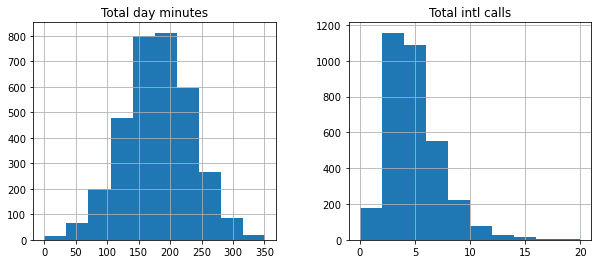

In [103]:
# Total day minutes / Total intl calls에 대한 히스토 그램을 그리시오 : 1판에 2개를 한 번에 그리세요
#일반적인 matplotlib로 하려면 subplot ~~ axes ~~ plot ~~ xlable~~
#여기서 DF에서 바로 그림으로 보고자 할 때
cols = ["Total day minutes","Total intl calls"]
data[cols].hist(figsize=(10,4))

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

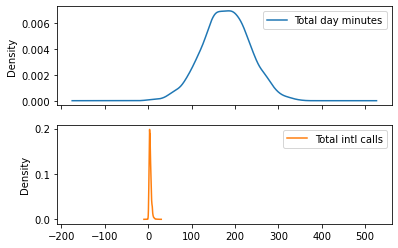

In [105]:
data[cols].plot(kind = "density", subplots = True) #subplots : 분리

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

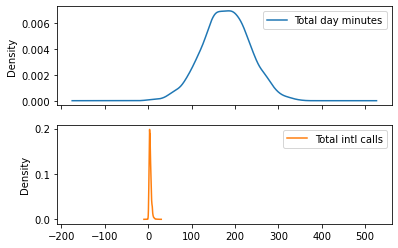

In [106]:
data[cols].plot(kind = "density", subplots = True, sharex = True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

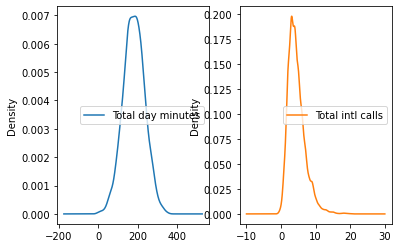

In [107]:
data[cols].plot(kind = "density", subplots = True, sharex =False, layout=(1,2))

C:\Users\yeonjikim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total intl calls', ylabel='Density'>

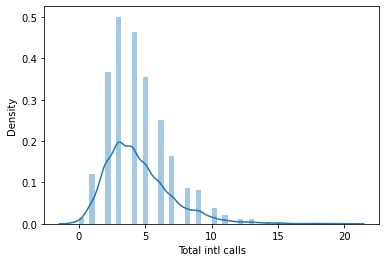

In [109]:
#toal intl calls 에 관련된 히스토그램과 밀도함수를 동시에 나타내기
sns.distplot(data["Total intl calls"])

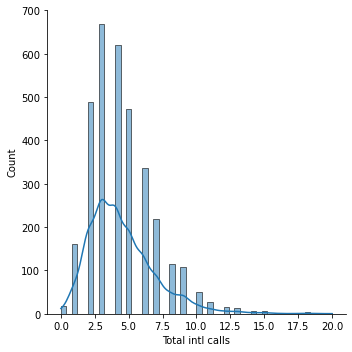

In [111]:
#distplot 대용으로 제시하는 방법 ... seaborn
sns.displot(data["Total intl calls"], kde = True)

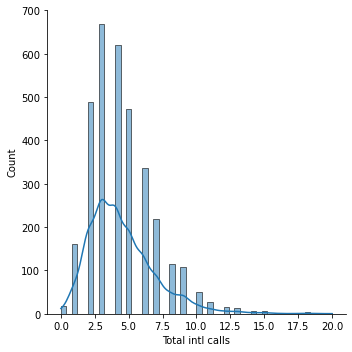

In [112]:
sns.displot(data = data, x="Total intl calls", kde = True)

<AxesSubplot:xlabel='Total intl calls'>

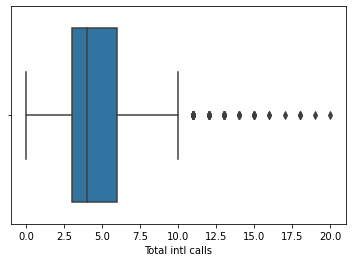

In [113]:
#Total intl calls에 대한 박스플롯을 생성
sns.boxplot(data = data, x = "Total intl calls")

<AxesSubplot:ylabel='Total intl calls'>

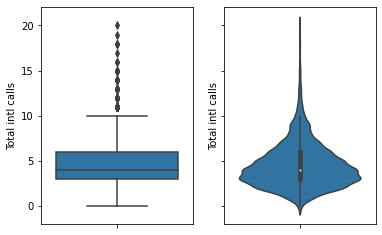

In [117]:
#Total intl calls 에 대한 boxplot와 violinplot 를 모두 생성
#그림판에 대한 지정과 그릴 영역에 대한 지정은 matplotlib : subplot
# -> 구체적으로 그릴 영역 axes
# -> 그 구체적인 영역에 seaborn, 다른 그래프 패키지로 그려서 타켓만.. axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharey = True)
#그릴 영역이 2개가 되는데 그 2개의 정보가 axes에 다 담겨있음
#왼쪽은 axes[0], 오른쪽은 axes[1] -> 정수인덱스로 그릴 영역에 대한 접근이 가능
sns.boxplot(data=data, y = "Total intl calls",ax = axes[0])
sns.violinplot(data = data, y = "Total intl calls", ax = axes[1])

In [119]:
#feature에 관련된 기본적인 통계 정보를 확인
data[cols].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [121]:
#churn의 컬럼의 값이 종류별로 몇 가지가 있는지 확인
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [122]:
data["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

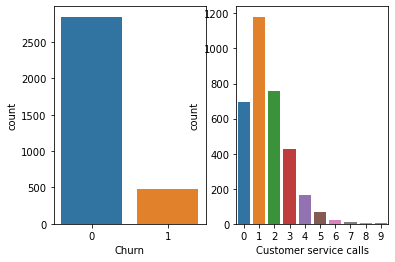

In [133]:
#count관련된 부분에 대한 그래프를 그리시오..대상은 churn/customer service calls
#DF핸들링을 하면서 뭐가 몇개 인지 보는 value_counts()에 대한 시각화
#seaborn에서는 countplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
sns.countplot(data = data, x="Churn" ,ax = axes[0])
sns.countplot(data = data, x="Customer service calls" ,ax = axes[1])

In [7]:
#수치 데이터 컬럼들을 리스트로 만들고, 이들에 대한 것들을 바탕으로 상관계수/히트맵
#상관계수는 기본적으로 수치형데이터들 사이에서 볼 수 있음 
# 내가 몇 개 보조가하는 것들에 대해서만 보고자 할 때
# 예) 전체 컬럼은 100개(다 숫자), 보고하 하는 컬럼은 90개 -> 90개의 컬럼을 쓰기에는 많음 -> 내가 필요로 하지 않는 10개 컬럼
# ---> 수학적인 집합의 개념을 사용하면 용이함 
#set(전체컬럼) - set(내가 안 보려는 컬럼) = set(내가 보려는 컬럼들만..)
#set(전체컬럼) - set(수치형이 아닌 컬럼들) = set(수치형인 컬럼들만..)

no_focus = ["State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls"]
focus = list(set(data.columns) - set(no_focus))
focus

['Total night minutes',
 'Total eve minutes',
 'Total night charge',
 'Total intl calls',
 'Total day charge',
 'Total day calls',
 'Total eve calls',
 'Total day minutes',
 'Account length',
 'Number vmail messages',
 'Total night calls',
 'Total intl charge',
 'Total intl minutes',
 'Total eve charge']

In [136]:
data[focus].corr()

Number vmail messages  Total eve charge  \
Number vmail messages               1.000000          0.017578   
Total eve charge                    0.017578          1.000000   
Total night charge                  0.007663         -0.012601   
Total intl minutes                  0.002856         -0.011043   
Account length                     -0.004628         -0.006745   
Total day minutes                   0.000778          0.007029   
Total intl charge                   0.002884         -0.011074   
Total day charge                    0.000776          0.007036   
Total night calls                   0.007123          0.007596   
Total intl calls                    0.013957          0.002541   
Total eve calls                    -0.005864         -0.011423   
Total day calls                    -0.009548         -0.021449   
Total eve minutes                   0.017562          1.000000   
Total night minutes                 0.007681         -0.012592   

                       Total night charge  Total intl minutes  Account length  \
Number vmail messages            0.007663            0.002856       -0.004628   
Total eve charge                -0.012601           -0.011043       -0.006745   
Total night charge               1.000000           -0.015214       -0.008960   
Total intl minutes              -0.015214            1.000000        0.009514   
Account length                  -0.008960            0.009514        1.000000   
Total day minutes                0.004300           -0.010155        0.006216   
Total intl charge               -0.015186            0.999993        0.009546   
Total day charge                 0.004301           -0.010157        0.006214   
Total night calls                0.011188           -0.013605       -0.013176   
Total intl calls                -0.012329            0.032304        0.020661   
Total eve calls                 -0.002056            0.008703        0.019260   
Total day calls                  0.022927            0.021565        0.038470   
Total eve minutes               -0.012593           -0.011035       -0.006757   
Total night minutes              0.999999           -0.015207       -0.008955   

                       Total day minutes  Total intl charge  Total day charge  \
Number vmail messages           0.000778           0.002884          0.000776   
Total eve charge                0.007029          -0.011074          0.007036   
Total night charge              0.004300          -0.015186          0.004301   
Total intl minutes             -0.010155           0.999993         -0.010157   
Account length                  0.006216           0.009546          0.006214   
Total day minutes               1.000000          -0.010092          1.000000   
Total intl charge              -0.010092           1.000000         -0.010094   
Total day charge                1.000000          -0.010094          1.000000   
Total night calls               0.022972          -0.013630          0.022972   
Total intl calls                0.008033           0.032372          0.008032   
Total eve calls                 0.015769           0.008674          0.015769   
Total day calls                 0.006750           0.021666          0.006753   
Total eve minutes               0.007043          -0.011067          0.007050   
Total night minutes             0.004323          -0.015180          0.004324   

                       Total night calls  Total intl calls  Total eve calls  \
Number vmail messages           0.007123          0.013957        -0.005864   
Total eve charge                0.007596          0.002541        -0.011423   
Total night charge              0.011188         -0.012329        -0.002056   
Total intl minutes             -0.013605          0.032304         0.008703   
Account length                 -0.013176          0.020661         0.019260   
Total day minutes               0.022972          0.008033         0.015769   
Total intl charge              -0.013630       

<AxesSubplot:>

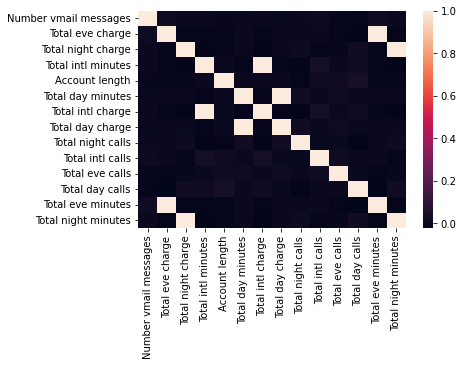

In [137]:
corr_mat = data[focus].corr()
sns.heatmap(corr_mat)

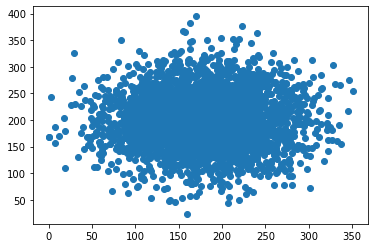

In [138]:
#Total day minutes / Total night minutes 간의 스캐터 그래프 그리기
plt.scatter(data["Total day minutes"], data["Total night minutes"])

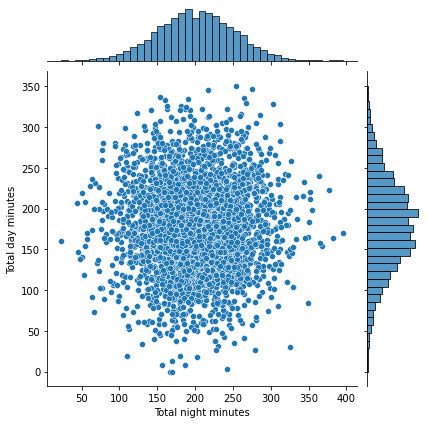

In [139]:
#그래프를 스캐터로 그리고, 그 옆에 밀도 함수 그래프가지 같이 나타내기
sns.jointplot(data = data, x = "Total night minutes", y = "Total day minutes", kind = "scatter")

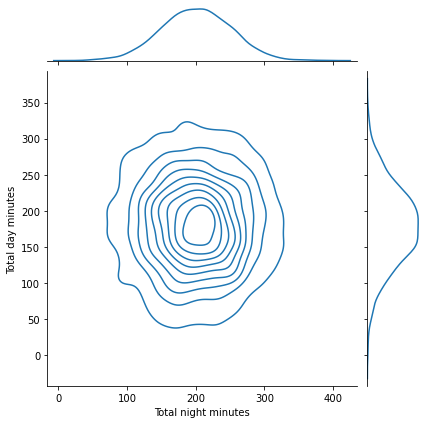

In [140]:
# 위의 plot을 연결된 형태로 그리기
sns.jointplot(data = data, x = "Total night minutes", y = "Total day minutes", kind = "kde")

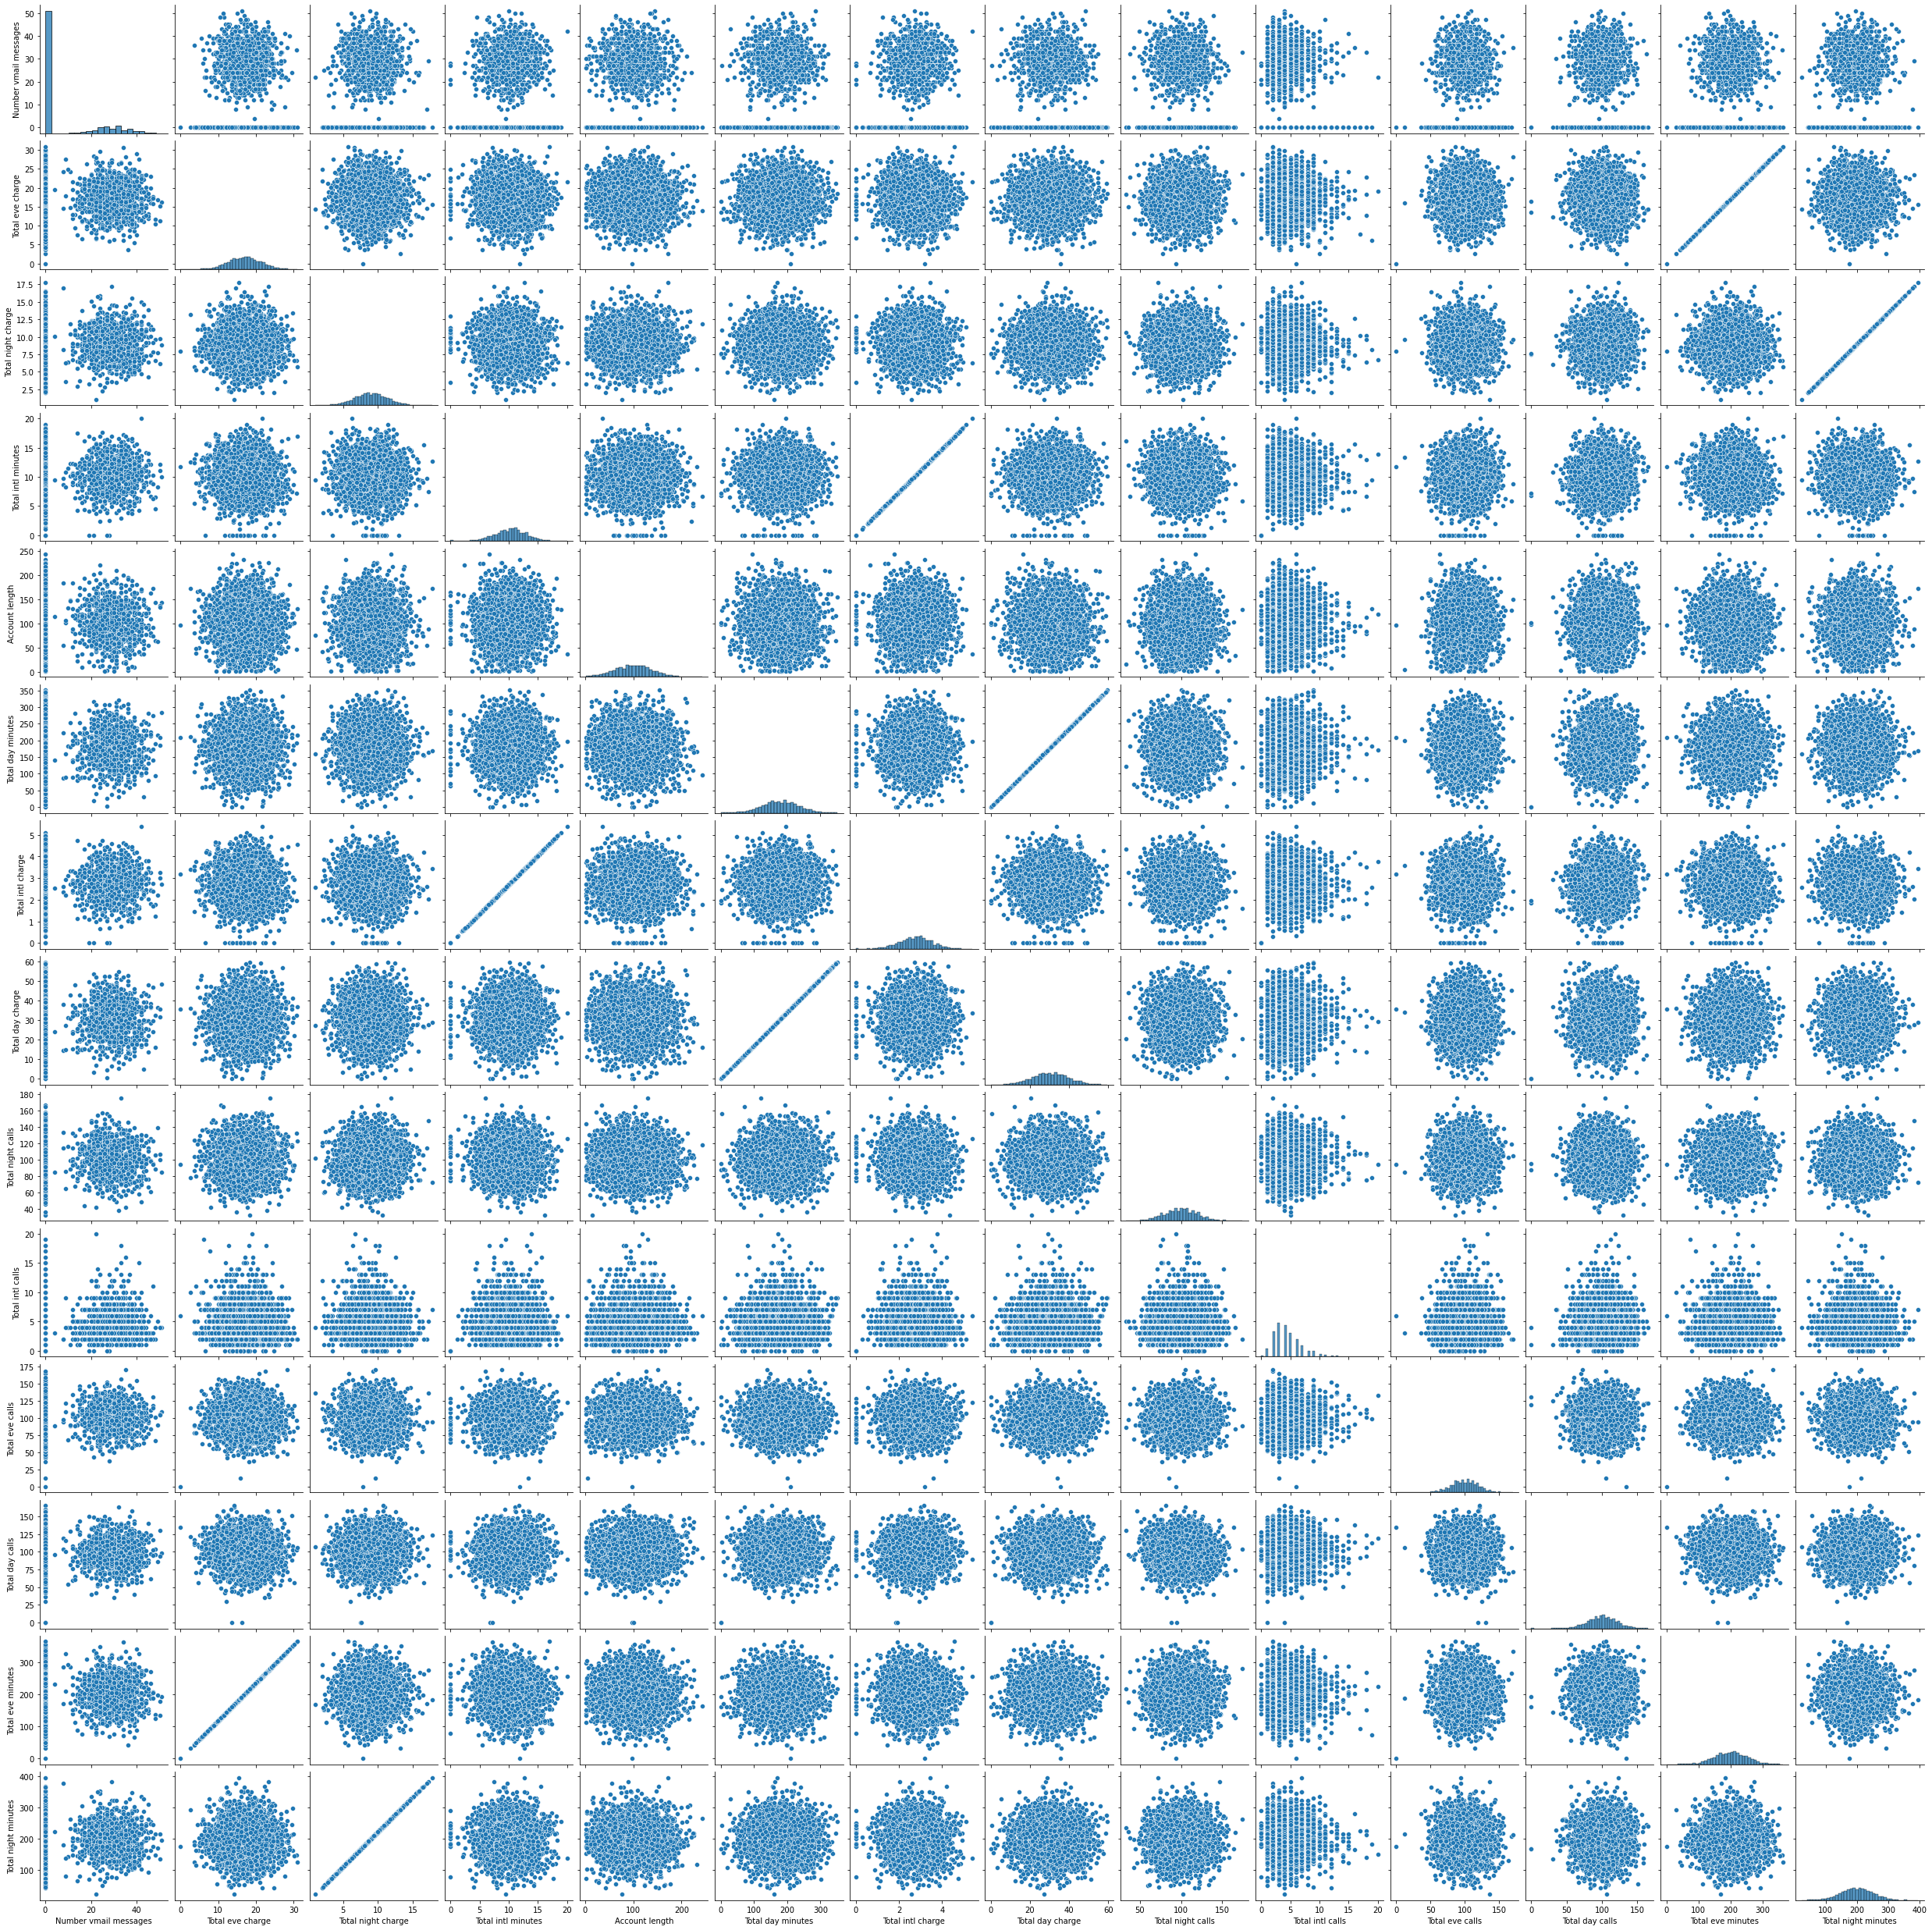

In [141]:
#앞에서 조정한 모든 수치변수들의 모든 값들에 대한 pairplot그리기
#scatter는 2개 변수간에 하는데 전체 데이터에서 2개씩 조합해서 다 scatter그래프 그려줘 : pairplot
#주의) 점을 많이 찍게 되니 데이터가 엄청 큰 데이터 DF는 메모리 튕긴다
sns.pairplot(data[focus])

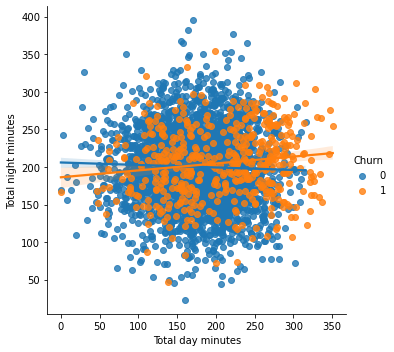

In [148]:
#위의 스캐터 그래프이지만, 카테고리 변수의 값에 대한 것들로 구별하면서 보고 싶을때
sns.lmplot(data=data,x="Total day minutes",
                    y="Total night minutes",
                    hue = "Churn", fit_reg=True)

In [8]:
#기존의 numerical 컬럼에다사 customer service calls를 추가를 하고, 해당하는 numerical 변수와 churn의 값에 대한 boxplot
focus.append("Customer service calls")
len(focus)

15

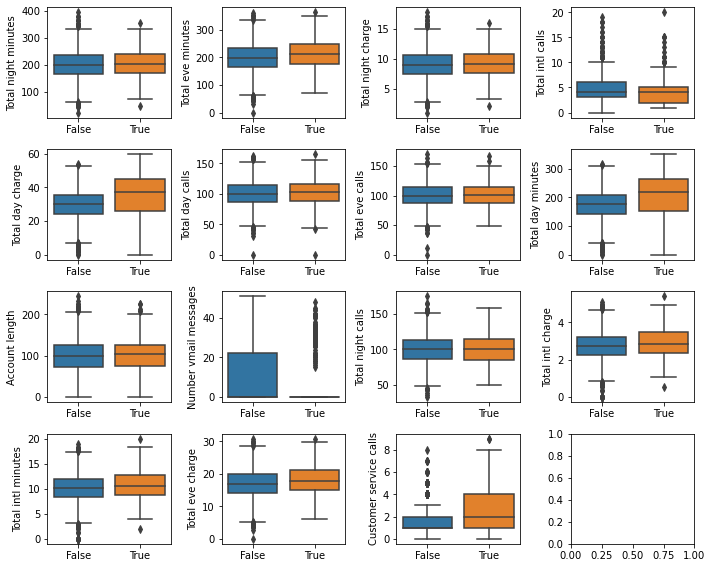

In [10]:
# 기계적으로 받은 데이터에서 뭔가 다 그려보자
# focus의 15개의 컬럼에 대해서 다 boxplot을 그릴 것임
# 단, Churn값에 따라서 각기 컬럼의 boxplot

# 15개의 그래프를 1장의 종이에 그리고 싶음
# -------> subplots 사용 4 by 4로

# 일단 그릴 영역들을 세팅을 하고...
fig, axes = plt.subplots(nrows=4, ncols = 4, figsize=(10,8))

# 기계적으로 15개의 컬럼을 돌려가면서, 아래 그릴영역 하나씩 하면 되니
for idx, col in enumerate(focus):
    # 구체적으로 영역 선택을 규칙적으로..
    my_ax = axes[idx//4, idx%4] # 가로 : 4로 나누었을 때 몫, 세로:4롤 나눌때 나머지
    sns.boxplot(data=data, x="Churn", y =col, ax=  my_ax)
    my_ax.set_xlabel("")
    my_ax.set_ylabel(col)
fig.tight_layout()

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

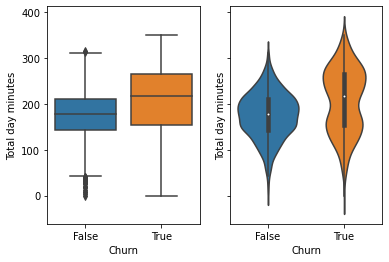

In [12]:
#서브플롯을 이용하여서 2개의 그래프를 그리는데, 1개는 boxplot/ 1개는 violinplot를 그리시오. 가로 : Churn, 세로 : Total day minutes
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.boxplot(data=data, x="Churn", y="Total day minutes", ax= axes[0])
sns.violinplot(data=data, x="Churn", y="Total day minutes", ax= axes[1])

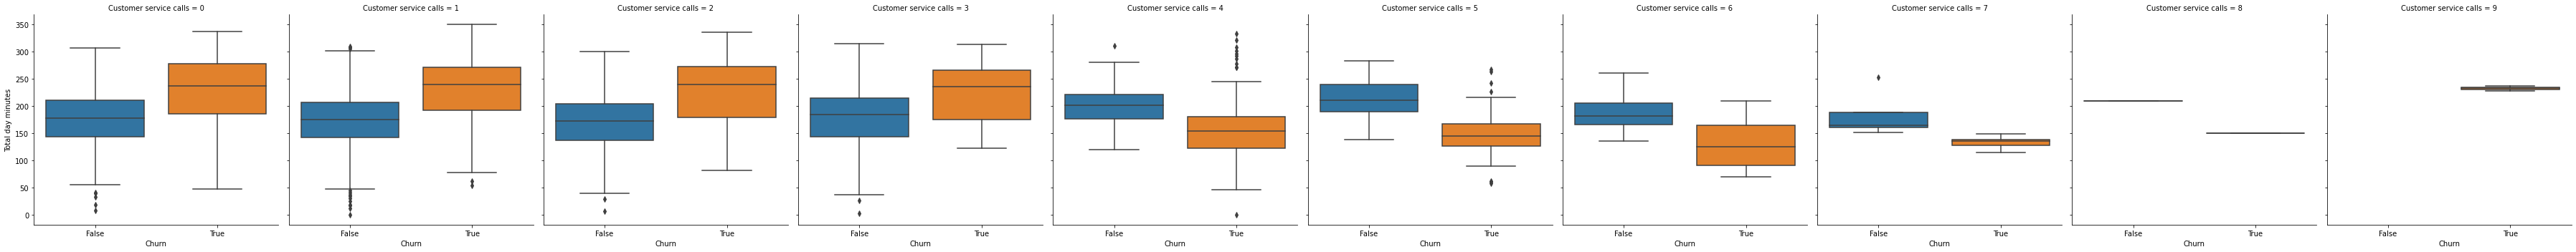

In [13]:
sns.catplot(data=data, 
             x="Churn",
            y = "Total day minutes",
            col = "Customer service calls",
            kind = "box")

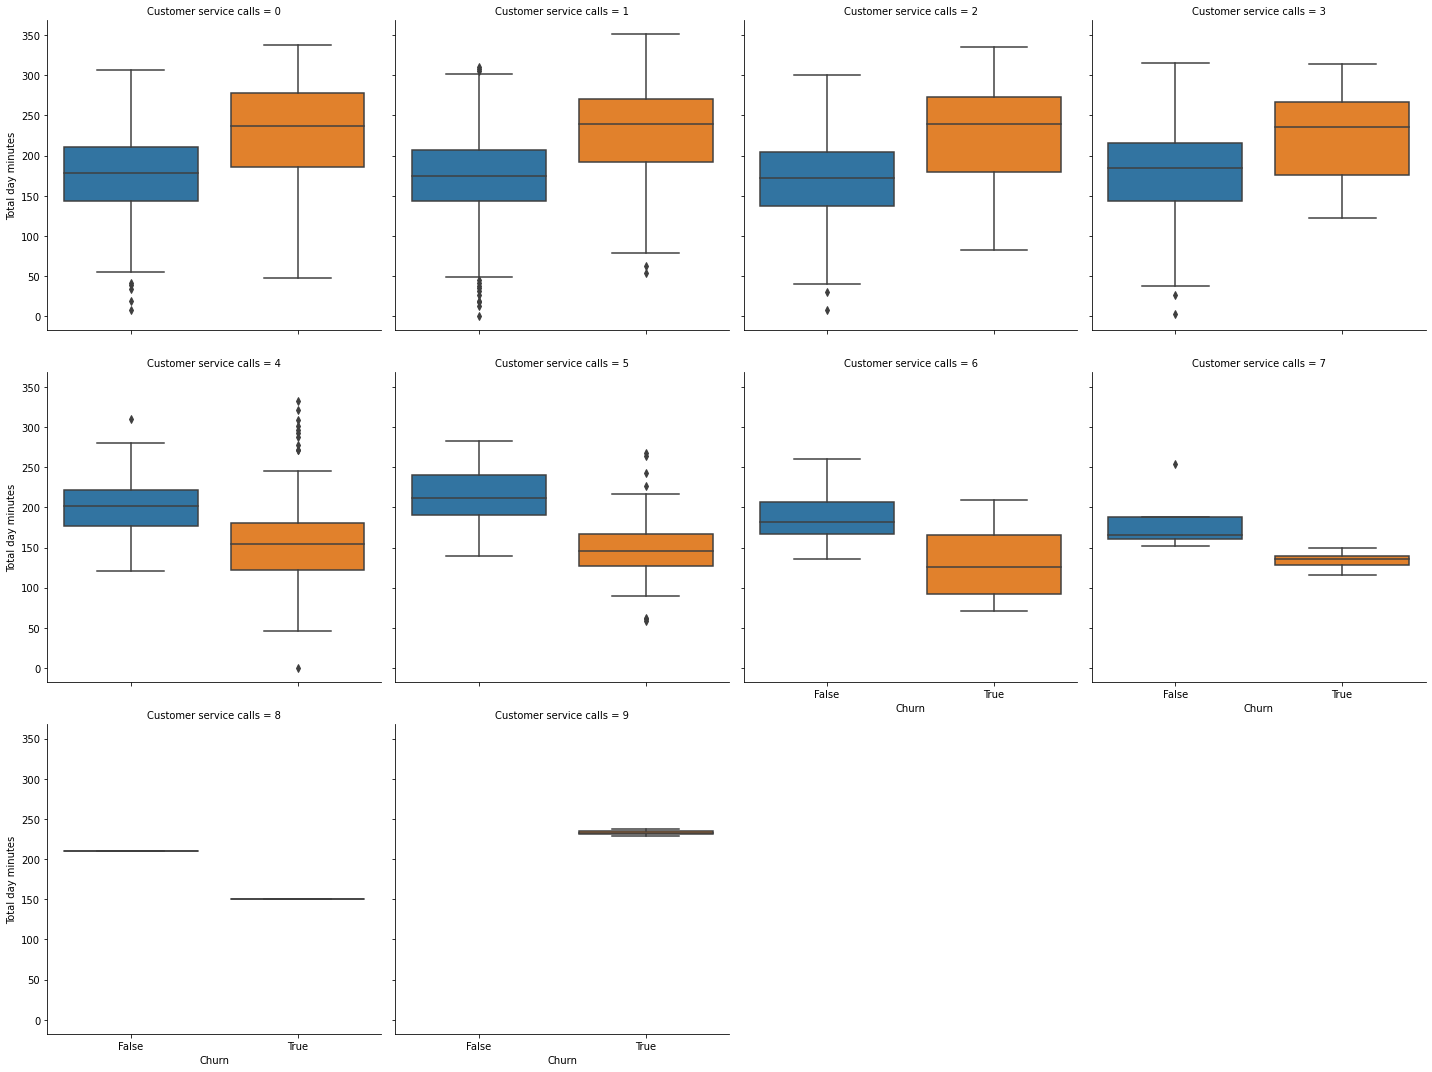

In [14]:
sns.catplot(data=data, 
             x="Churn",
            y = "Total day minutes",
            col = "Customer service calls",
            kind = "box",
            col_wrap = 4)

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

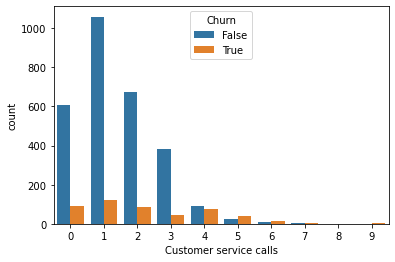

In [15]:
#Customer service calls에 대한 값을 countplot을 그리는데, churn의 값을 기준으로 모두 보고싶을때
sns.countplot(data=data, x="Customer service calls",
              hue = "Churn")

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

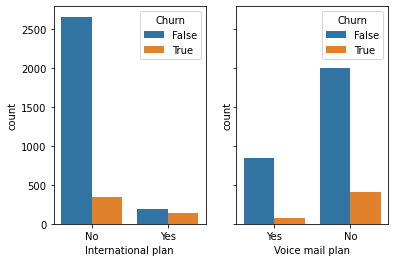

In [16]:
#churn의 값에 따른 countplot를 생성
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
sns.countplot(data=data, x= "International plan", hue="Churn", ax = axes[0])
sns.countplot(data=data, x= "Voice mail plan", hue="Churn", ax = axes[1])

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

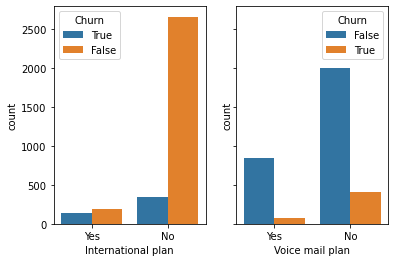

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
sns.countplot(data=data, x= "International plan", hue="Churn", order=["Yes","No"],hue_order=[True,False],ax = axes[0])
sns.countplot(data=data, x= "Voice mail plan", hue="Churn", order=["Yes","No"],ax = axes[1])

<AxesSubplot:xlabel='International plan', ylabel='count'>

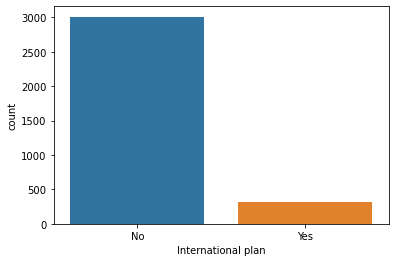

In [18]:
sns.countplot(data=data, x= "International plan")

<AxesSubplot:xlabel='International plan', ylabel='count'>

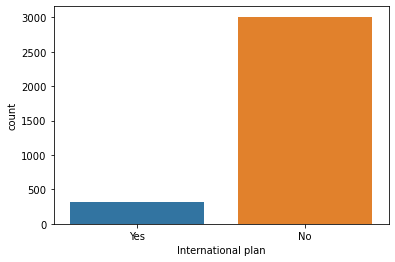

In [19]:
sns.countplot(data=data, x= "International plan", order=["Yes","No"])